### import modules

In [4]:
from cvxpy import *
import numpy
import seaborn as sns
# import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set()

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### generate data

In [27]:
# Problem data.
n = 30
x_i = np.array([(i-1)/(n-1) for i in np.arange(n)])
eps_i = np.random.randn(n,1)

In [28]:
k= np.array([1,2,3,4])

f_x = np.zeros((x_i.shape[0],1))
index = 0 
for val in x_i:
    f_x[index] =  10*np.sum(val>(k/5))
    index+=1
    
y = f_x + eps_i 
y[14] = 0
    

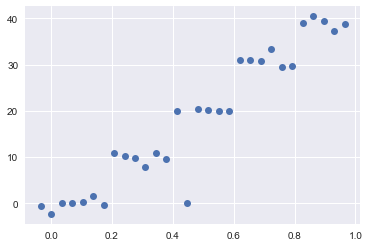

In [29]:
plt.plot(x_i,y,'o')

### least squares

In [2]:
# Construct the problem.
x = Variable(n)
objective = Minimize(sum_squares(A*x - b))
constraints = [0 <= x, x <= 1]
prob = Problem(objective, constraints)

# The optimal objective is returned by prob.solve().
result = prob.solve()
# The optimal value for x is stored in x.value.
print(x.value)
# The optimal Lagrange multiplier for a constraint
# is stored in constraint.dual_value.
print(constraints[0].dual_value)

[[  2.74652308e-08]
 [  2.85638777e-02]
 [  2.75725989e-08]
 [  4.78319436e-08]
 [  2.63772742e-09]
 [  1.49296787e-01]
 [  1.19197012e-07]
 [  2.09644973e-08]
 [  2.46747598e-01]
 [  5.78236593e-01]
 [  5.29014714e-09]
 [  1.01716256e-03]
 [  8.73735490e-09]
 [  2.26771054e-01]
 [  1.37216315e-08]
 [  2.10136926e-08]
 [  4.08406457e-08]
 [  4.52408177e-09]
 [  2.55073731e-08]
 [  6.32803288e-09]]
[[  2.50930786e+00]
 [  2.67843812e-06]
 [  2.78353157e+00]
 [  1.79423617e+00]
 [  1.30858969e+01]
 [  5.59967336e-07]
 [  7.37035770e-01]
 [  3.35348867e+00]
 [  3.53776686e-07]
 [  1.58359789e-07]
 [  8.93824713e+00]
 [  3.08617390e-04]
 [  7.02959474e+00]
 [  3.97062919e-07]
 [  4.71054027e+00]
 [  3.18864113e+00]
 [  2.06076796e+00]
 [  1.00817336e+01]
 [  3.04814645e+00]
 [  8.53266394e+00]]


### huber
